<a href="https://colab.research.google.com/github/Kesavarao16/FlightPricePrediction/blob/main/plant_disease_prediction_CNN_deep_leanring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#seeding for reproduciblity
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [5]:
kaggle_credentails=json.load(open("kaggle.json"))

In [6]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]


In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:28<00:00, 99.1MB/s]
100% 2.04G/2.04G [00:28<00:00, 77.5MB/s]


In [8]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
#base directry where the file are there segmented is off without back grount , coloured is like rgb colured image ,anf grayscale is adout balck and white images
#where os is envo and listdir is where the directry odf file ispresent
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'grayscale', 'color']
38
['Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)', 'Strawberry___Leaf_scorch']
38
['Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)', 'Strawberry___Leaf_scorch']
38
['Squash___Powdery_mildew', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Grape___Esca_(Black_Measles)', 'Strawberry___Leaf_scorch']


In [11]:
print(len(os.listdir("plantvillage dataset/segmented")))
print(len(os.listdir("plantvillage dataset/color")))
print(len(os.listdir("plantvillage dataset/grayscale")))

38
38
38


In [12]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['ca0f32cb-25b3-4dcc-887f-fa4753c25ed5___Mt.N.V_HL 8998.JPG', 'b7b4fb14-c350-4c88-8a2c-2e35c239af6a___Mt.N.V_HL 9051.JPG', 'edaa5185-4c46-42f4-98c9-cb17830c6fcf___Mt.N.V_HL 8977.JPG', '811f5365-f5a3-4659-8302-009fb5275541___Mt.N.V_HL 8946.JPG', '32bba022-49d8-41ad-99e2-89af85eac71a___Mt.N.V_HL 6055.JPG']


In [15]:
base_dir="plantvillage dataset/color"

(256, 256, 3)


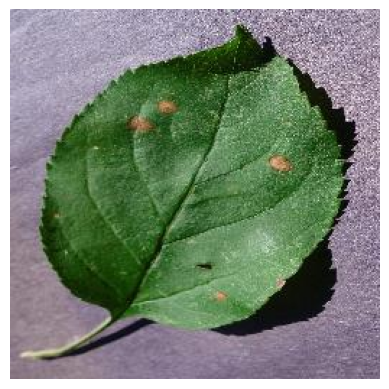

In [16]:
image_path='/content/plantvillage dataset/color/Apple___Black_rot/02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [17]:
image_path='/content/plantvillage dataset/color/Apple___Black_rot/02168189-aa75-4284-a7f0-8ca5901ea783___JR_FrgE.S 2948.JPG'
img=mpimg.imread(image_path)
print(img)

[[[196 191 214]
  [170 165 188]
  [161 156 179]
  ...
  [169 156 174]
  [156 143 161]
  [187 174 192]]

 [[157 152 175]
  [153 148 171]
  [151 146 169]
  ...
  [151 138 156]
  [183 170 188]
  [137 124 142]]

 [[164 159 182]
  [154 149 172]
  [165 160 183]
  ...
  [158 145 163]
  [208 195 213]
  [158 145 163]]

 ...

 [[139 121 133]
  [140 122 134]
  [139 121 133]
  ...
  [114  99 122]
  [121 106 129]
  [118 103 126]]

 [[136 118 132]
  [137 119 133]
  [137 119 131]
  ...
  [131 116 139]
  [126 111 134]
  [126 111 134]]

 [[129 111 125]
  [131 113 127]
  [132 114 126]
  ...
  [131 116 139]
  [117 102 125]
  [137 122 145]]]


In [19]:
# Image Parameters
img_size = 224
batch_size = 32

In [20]:


# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [21]:

# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)



Found 43456 images belonging to 38 classes.


In [22]:

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [23]:
#Convolutional Neural Network


# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#output layer softmax for multiclass problems
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))#no of class present in  the dataset


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [25]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
print(train_generator.samples);

43456


In [31]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 101s 74ms/step - loss: 0.0958 - accuracy: 0.9682 - val_loss: 0.5185 - val_accuracy: 0.8753
Epoch 2/5
1358/1358 [==============================] - 99s 73ms/step - loss: 0.0676 - accuracy: 0.9781 - val_loss: 0.6051 - val_accuracy: 0.8686
Epoch 3/5
1358/1358 [==============================] - 102s 75ms/step - loss: 0.0549 - accuracy: 0.9829 - val_loss: 0.6656 - val_accuracy: 0.8715
Epoch 4/5
1358/1358 [==============================] - 103s 76ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.6493 - val_accuracy: 0.8747
Epoch 5/5
1358/1358 [==============================] - 104s 76ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 0.8097 - val_accuracy: 0.8485


In [32]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
339/339 [==============================] - 19s 56ms/step - loss: 0.8097 - accuracy: 0.8485
Validation Accuracy: 84.85%


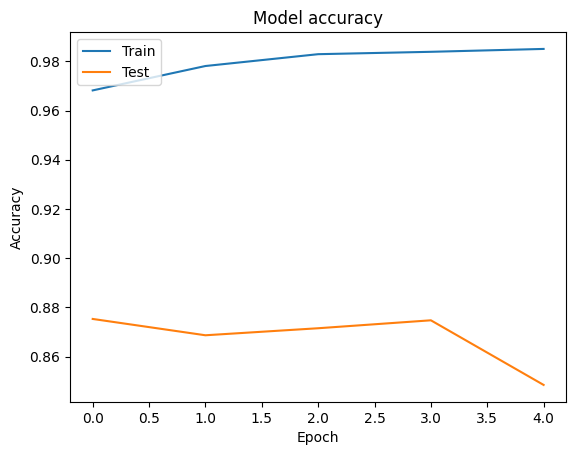

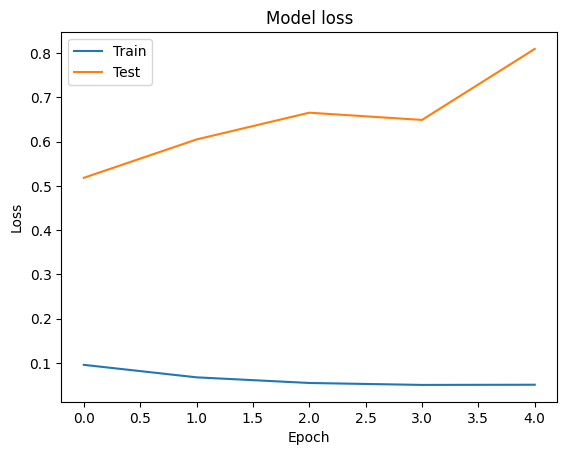

In [33]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [34]:

# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array


In [35]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [36]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [37]:


class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [38]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [41]:
# Example Usage
image_path = '/content/test_apple_black_rot.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

1/1 [==============================] - 0s 258ms/step


In [42]:
# Output the result
print("Predicted Class Name:", predicted_class_name)

Predicted Class Name: Apple___Black_rot


In [43]:
# Example Usage
f1image_path = '/content/test_potato_early_blight.jpg'
predicted_class= predict_image_class(model, f1image_path, class_indices)

1/1 [==============================] - 0s 17ms/step


In [44]:
# Output the result
print("Predicted Class Name:", predicted_class)

Predicted Class Name: Potato___Early_blight


In [45]:
fimage_path = '/content/test_blueberry_healthy.jpg'
predicted_name = predict_image_class(model, fimage_path, class_indices)

1/1 [==============================] - 0s 26ms/step


In [46]:
# Output the result
print("Predicted Class Name:", predicted_name)

Predicted Class Name: Blueberry___healthy


In [47]:
f3image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/042944e9-9d32-4655-9c99-3908c8d30e72___FREC_Pwd.M 5152.JPG'
predicted = predict_image_class(model, f3image_path, class_indices)

1/1 [==============================] - 0s 18ms/step


In [48]:
# Output the result
print("Predicted Class Name:", predicted)

Predicted Class Name: Cherry_(including_sour)___Powdery_mildew
